# Step 1

In [1]:
# Import Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from pycaret.classification import *
from sklearn.metrics import balanced_accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt

# Step 2

In [2]:
# Load the Data
df = pd.read_csv(Path("Resources/healthcare-dataset-stroke-data.csv"))
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


# Step 3: Data Analysis

In [3]:
# Looking at data to better understandance
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [4]:
# Check columns datatypes
df.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [5]:
#Checing duplicates
df.duplicated().sum()

0

In [6]:
#dataset info before droping values
print(f'The dataset has {df.shape[0]} rows and {df.shape[1]} columns.')
print('Missing values per column:')
print(df.isnull().sum())

The dataset has 5110 rows and 12 columns.
Missing values per column:
id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64


In [7]:
# Remove missing values 
df.dropna(inplace = True)

In [8]:
#dataset info after droping values
print(f'The dataset has {df.shape[0]} rows and {df.shape[1]} columns.')
print('Missing values per column:')
print(df.isnull().sum())

The dataset has 4909 rows and 12 columns.
Missing values per column:
id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64


In [9]:
# Copying dataset for future use
df_clean = df.copy()
df.head(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [10]:
#Checing values in Gender column
df_clean["gender"].value_counts()

Female    2897
Male      2011
Other        1
Name: gender, dtype: int64

In [11]:
#finding index for gender value other
other = df_clean.loc[df_clean['gender']=='Other']
other.index[0]

3116

In [12]:
#drop that value
df_clean = df_clean.drop(other.index[0])

In [13]:
#cheking that value has been dropped
df_clean["gender"].value_counts()

Female    2897
Male      2011
Name: gender, dtype: int64

In [14]:
# Convert values for Gender Male to 1 and Female to 0
# and ever_married Yes to 1 and No to 0
df_clean['gender'] = df_clean['gender'].map({'Male': 1, 'Female': 0})
df_clean['ever_married'] = df_clean['ever_married'].map({'Yes': 1, 'No': 0})

In [15]:
# Convert values for Residence_type Urban to 1 and Rural to 0
df_clean['Residence_type'] = df_clean['Residence_type'].map({'Urban': 1, 'Rural': 0})

In [16]:
#Checking what values are available in work types column
df_clean["work_type"].value_counts()

Private          2810
Self-employed     775
children          671
Govt_job          630
Never_worked       22
Name: work_type, dtype: int64

In [17]:
# Convert values for work type 
df_clean['work_type'] = df_clean['work_type'].map({'Private': 0, 'Self-employed': 1,'children':2,'Govt_job':3,'Never_worked':4})

In [18]:
#Checking what values are available in smoking status column
df_clean["smoking_status"].value_counts()

never smoked       1852
Unknown            1483
formerly smoked     836
smokes              737
Name: smoking_status, dtype: int64

In [19]:
# Convert values for smoking status
df_clean['smoking_status'] = df_clean['smoking_status'].map({'never smoked': 0, 'Unknown': 1,'formerly smoked':2,'smokes':3})

In [20]:
#copying data set for future use
df_ready = df_clean.copy()

In [21]:
df_ready = df_ready.drop(columns=['id', 'work_type', 'smoking_status'])
df_ready

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke
0,1,67.0,0,1,1,1,228.69,36.6,1
2,1,80.0,0,1,1,0,105.92,32.5,1
3,0,49.0,0,0,1,1,171.23,34.4,1
4,0,79.0,1,0,1,0,174.12,24.0,1
5,1,81.0,0,0,1,1,186.21,29.0,1
...,...,...,...,...,...,...,...,...,...
5104,0,13.0,0,0,0,0,103.08,18.6,0
5106,0,81.0,0,0,1,1,125.20,40.0,0
5107,0,35.0,0,0,1,0,82.99,30.6,0
5108,1,51.0,0,0,1,0,166.29,25.6,0


In [22]:
#checing values in stroke columns
df_ready["stroke"].value_counts()

0    4699
1     209
Name: stroke, dtype: int64

In [23]:
#save cleaned data frame to csv
df_ready.to_csv('Resources/datacleaned.csv', index=False)

# Step 4:

In [24]:
#setup Pycaret
clf = setup(data = df_ready, target = 'stroke', fix_imbalance = True, session_id = 42)

,Description,Value
0,Session id,42
1,Target,stroke
2,Target type,Binary
3,Original data shape,"(4908, 9)"
4,Transformed data shape,"(8051, 9)"
5,Transformed train set shape,"(6578, 9)"
6,Transformed test set shape,"(1473, 9)"
7,Numeric features,8
8,Preprocess,True
9,Imputation type,simple


In [25]:
# Best model
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dummy,Dummy Classifier,0.9575,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0490
rf,Random Forest Classifier,0.9453,0.7928,0.0543,0.1783,0.0812,0.0592,0.0727,0.1570
lightgbm,Light Gradient Boosting Machine,0.9435,0.8129,0.0624,0.1443,0.0841,0.0600,0.0669,0.1280
gbc,Gradient Boosting Classifier,0.9432,0.8201,0.1162,0.2099,0.1467,0.1201,0.1270,0.1990
et,Extra Trees Classifier,0.9429,0.7805,0.0629,0.1290,0.0830,0.0581,0.0623,0.1270
ada,Ada Boost Classifier,0.9345,0.8161,0.1867,0.2079,0.1901,0.1569,0.1602,0.0890
dt,Decision Tree Classifier,0.9231,0.5906,0.2271,0.1825,0.2014,0.1618,0.1633,0.0430
knn,K Neighbors Classifier,0.8079,0.6972,0.4890,0.1078,0.1763,0.1148,0.1585,0.0580
lr,Logistic Regression,0.7648,0.8575,0.8033,0.1314,0.2255,0.1645,0.2605,0.4330
qda,Quadratic Discriminant Analysis,0.7624,0.8409,0.7771,0.1259,0.2166,0.1548,0.2467,0.0440


Best model by accuracy is Dummy Clasifier, but by AUC and Recall Linear Discriminant Analysis.

# Step 5: Comparing models

In [26]:
# Separate the data into labels and features

# Separate the y variable, the labels
y = df_ready['stroke']

# Separate the X variable, the features
X = df_ready.drop(columns='stroke')

In [27]:
# Review the y variable Series
y[:5]

0    1
2    1
3    1
4    1
5    1
Name: stroke, dtype: int64

In [28]:
# Review the X variable DataFrame
X.head()

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi
0,1,67.0,0,1,1,1,228.69,36.6
2,1,80.0,0,1,1,0,105.92,32.5
3,0,49.0,0,0,1,1,171.23,34.4
4,0,79.0,1,0,1,0,174.12,24.0
5,1,81.0,0,0,1,1,186.21,29.0


In [29]:
# Import the train_test_learn module
from sklearn.model_selection import train_test_split

# Split the data using train_test_split
# Assign a random_state of 1 to the function
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

## Model 1: Dummy Classifier

In [30]:
# Instantiate the Dummy Classifier model
from sklearn.dummy import DummyClassifier
classifier = DummyClassifier(strategy="most_frequent")
classifier

# Fit the model using training data
classifier.fit(X_train, y_train)

DummyClassifier(constant=None, random_state=None, strategy='most_frequent')

In [31]:
# Make a prediction using the testing data
predictions = classifier.predict(X_test)
predictions

array([0, 0, 0, ..., 0, 0, 0])

In [32]:
classifier.score(X, y)

0.9574164629176855

In [40]:
score = balanced_accuracy_score(y_test, predictions)
score

0.5

In [33]:
# Generate a confusion matrix for the model
cm = confusion_matrix(y_test, predictions)
display(cm)

array([[1164,    0],
       [  63,    0]])

In [34]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1164
           1       0.00      0.00      0.00        63

    accuracy                           0.95      1227
   macro avg       0.47      0.50      0.49      1227
weighted avg       0.90      0.95      0.92      1227



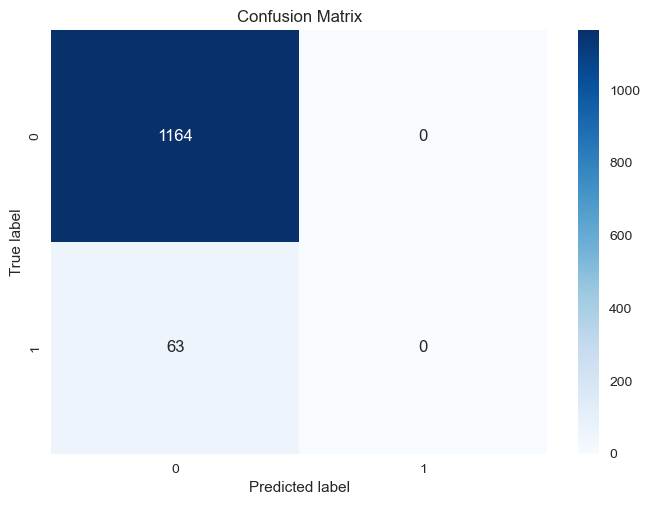

In [35]:
conf_matrix = confusion_matrix(y_test, predictions)
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title(f"Confusion Matrix")
plt.show()

True Negatives: 1165
False Positives: 0
False Negatives: 63
True Positives: 0

As we can see the accuracy of the model is quite high 95.7%, but from the confusion matrix could be seen that all the prediction is just negative, so we can't use that model to predict stroke risk, because in any case it would give us negative result.

## Model 2: Linear Discriminant Analysis

In [36]:
# Instantiate the Linear Discriminant Analysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
clfLinear = LinearDiscriminantAnalysis()
clfLinear

# Fit the model using training data
clfLinear.fit(X_train, y_train)

LinearDiscriminantAnalysis(covariance_estimator=None, n_components=None,
                           priors=None, shrinkage=None, solver='svd',
                           store_covariance=False, tol=0.0001)

In [38]:
# Make a prediction using the testing data
clfpredict = clfLinear.predict(X_test)

In [39]:
clfLinear.score(X, y)

0.9539527302363489

In [42]:
scoreLin = balanced_accuracy_score(y_test, clfpredict)
scoreLin

0.5454712812960236

In [43]:
cmLin = confusion_matrix(y_test, clfpredict)
display(cmLin)

array([[1159,    5],
       [  57,    6]])

In [44]:
print(classification_report(y_test, clfpredict))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1164
           1       0.55      0.10      0.16        63

    accuracy                           0.95      1227
   macro avg       0.75      0.55      0.57      1227
weighted avg       0.93      0.95      0.93      1227



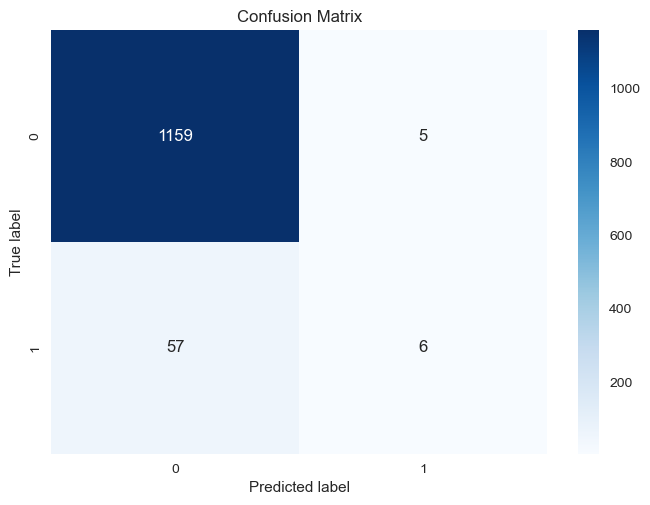

In [46]:
conf_matrix = confusion_matrix(y_test, clfpredict)
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title(f"Confusion Matrix")
plt.show()

True Negatives: 1159
False Positives: 5
False Negatives: 57
True Positives: 6

As we can see the accuracy of the model is quite high 95.3%.